In [26]:
import numpy as np
import sys
import time
import os
import h5py
import os.path as op
import matplotlib.cm as cm
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import array
%matplotlib inline

sys.path.append('..')
sys.path.append('../src_cython')
from zwatershed import zwatershed_and_metrics
from z_watershed import *
from visualization.visualize_funcs import *

path_to_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/'
path_to_data = path_to_folder + 'data/'

start = time.clock()
threshes = [2000]
hdf5_gt_file = path_to_data + 'groundtruth_seg_thick.h5'  # /groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'
hdf5_pred_file = path_to_data + 'tstvol-1_2.h5'  # /tier2/turaga/singhc/train/output_200000/tstvol-1_2.h5'
out = path_to_data + 'out/'  # '/groups/turaga/home/singhc/evaluation/out/'
save_threshes = threshes
rand = 0
p1, p2, p3 = 210, 150, 180

hdf5_gt = h5py.File(hdf5_gt_file, 'r')
hdf5_aff = h5py.File(hdf5_pred_file, 'r')
gt = np.asarray(hdf5_gt[hdf5_gt.keys()[0]], dtype='uint32')
aff = np.asarray(hdf5_aff[hdf5_aff.keys()[0]], dtype='float32')
aff = aff[:, p1:(-1 * p1), p2:(-1 * p2), p3:(-1 * p3)]
gt = trim_arbitrary_aff(gt, aff)

nhood = mknhood3d(1)
node1, node2, edge_affs = affgraph_to_edgelist(aff, nhood)
print "len node1", len(node1)
print "n1,n2,edge", min(node1), max(node1), min(node2), max(node2), min(edge_affs), max(edge_affs)
print "\noriginal watershed..."
seg_one, segs_old, rand = zwatershed_and_metrics(gt, aff, threshes, save_threshes)

print "\nnew watershed..."
segs_new = zwatershed_and_metrics_edge(gt, np.array(node1, dtype='uint32'), np.array(node2, dtype='uint32'),
                                       np.array(edge_affs), threshes, save_threshes)

print rand
print "time: ", time.clock() - start

len node1 330189
n1,n2,edge 2 114047 1 114046 6.21402e-07 1.0

original watershed...

new watershed...
[9505 9506 9507 9508 9509 9510 9511 9512 9513 9514] [ 1  2  3  4  5  6  7  8  9 10] [ 0.99992871  0.99977618  0.99963367  0.99974269  0.9999088   0.99996471
  0.99997735  0.99997687  0.9999553   0.99990773]
{'seg': array([     0,      1,   9506, ..., 114045, 114046, 114047], dtype=uint32), 'counts': array([0], dtype=uint32), 'rg': array([], shape=(0, 3), dtype=float32)}
{'V_Rand_merge': [0.982662708698413], 'V_Rand_split': [0.8172403490549419], 'V_Rand': 0.892349853621964}
time:  1.820384


In [27]:
## Open training data and labels
data_folder = '/Users/chandansingh/drive/janelia/conv_net_scripts/data/'# 'nobackup/turaga/data/FlyEM/fibsem_medulla_7col/tstvol-520-1/'
os.chdir('/.')
f = h5py.File(data_folder + 'im_uint8.h5', 'r')
im = f[f.keys()[0]] # was 'main'
g = h5py.File(data_folder + 'groundtruth_aff.h5', 'r')
label_set = np.asarray(g[g.keys()[0]],dtype='float32') #3,z,y,x - was 'main'
label_set = np.transpose(label_set,(1,2,3,0))

(520, 520, 520) (520, 520, 520, 3) (12, 132, 72)
(12, 132, 72) (12, 132, 72, 3) (12, 132, 72)
old num 2869 new num 41061


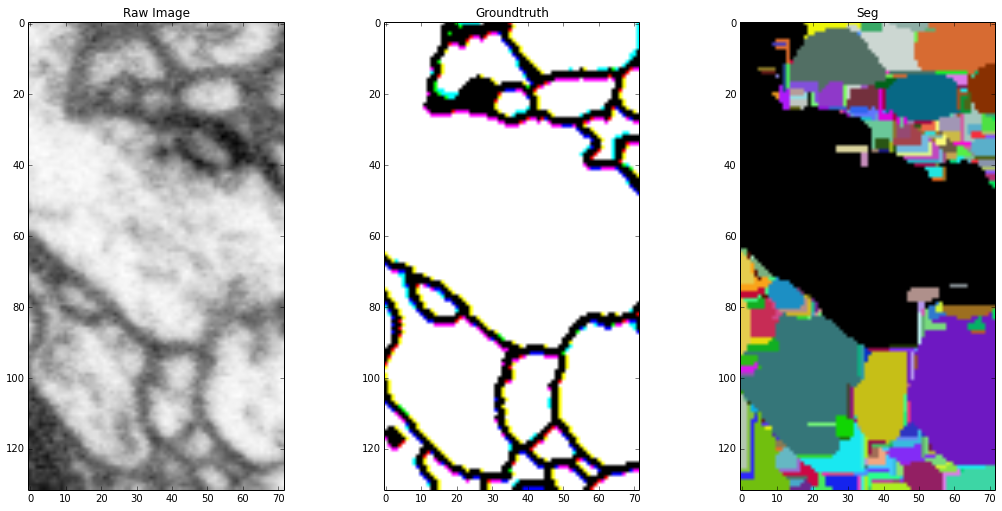

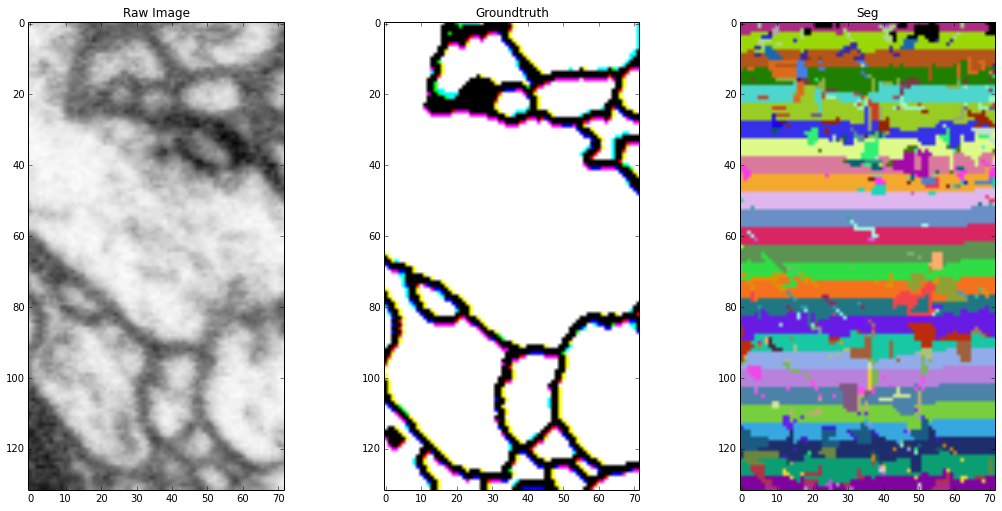

In [28]:
# view segs
seg_old = seg_one
seg_new = segs_new[0]
# im,label_set=trim(im,label_set,seg) 
# seg = seg.transpose((2, 1, 0)).reshape(shape).transpose((2, 1, 0))
print im.shape,label_set.shape,seg_new.shape
im,label_set=trim_arbitrary(im,label_set,seg_new) 
print im.shape,label_set.shape,seg_new.shape
print "old num",len(np.unique(seg_old)),"new num",len(np.unique(seg_new))
# display_seg(im, label_set, seg, im_size=label_set.shape[0], im2_size=seg.shape[0])
display_arbitrary_seg(im, label_set, seg_old)
display_arbitrary_seg(im, label_set, seg_new)